In [267]:
# import 'Pandas' 
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# import train-test split 
from sklearn.model_selection import train_test_split

# import various functions from statsmodels
import statsmodels
import statsmodels.api as sm

# import 'stats'
from scipy import stats

# 'metrics' from sklearn is used for evaluating the model performance
from sklearn.metrics import mean_squared_error,mean_absolute_error

# import function to perform linear regression
from sklearn.linear_model import LinearRegression,SGDRegressor,Ridge,Lasso,ElasticNet,LogisticRegression

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler

# import function to perform GridSearchCV
from sklearn.model_selection import GridSearchCV


In [268]:
data=pd.read_csv("healthcare-dataset-stroke-data.csv")

# 1. Read the dataset and view the first 10 rows of it.

In [269]:
data.head(10)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
6,53882,Male,74.0,1,1,Yes,Private,Rural,70.09,27.4,never smoked,1
7,10434,Female,69.0,0,0,No,Private,Urban,94.39,22.8,never smoked,1
8,27419,Female,59.0,0,0,Yes,Private,Rural,76.15,NaN,Unknown,1
9,60491,Female,78.0,0,0,Yes,Private,Urban,58.57,24.2,Unknown,1


# 2. Check the shape/dimension of the dataset


In [270]:
data.shape

(5110, 12)

# 3. Check for the missing values.Display number of missing values per column.

In [271]:
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [272]:
# here we can observe that bmi feature has 201 missing value are  present 

# 4. Investigate and predict the missing BMI Value.

<AxesSubplot:xlabel='bmi'>

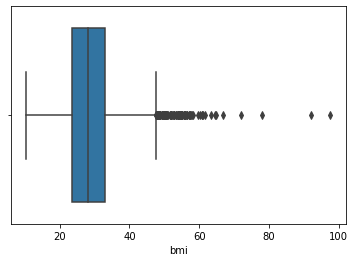

In [273]:
sns.boxplot(data.bmi)

In [274]:
null_counts = data.isnull().sum()/len(data)
null_counts

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [275]:
data.bmi.median()

28.1

In [276]:
data['bmi']=data['bmi'].fillna(data.bmi.median())

In [277]:
data.bmi.isnull().sum()

0

# 5. Check the datatype, number of non null values and name of each variable in the dataset.

In [278]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                5110 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


# 6. Check the descriptive statistics of the dataset.

In [279]:
data.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.862035,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.699562,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.800000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,32.800000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [280]:
data.describe(include='object')

,gender,ever_married,work_type,Residence_type,smoking_status
count,5110,5110,5110,5110,5110
unique,3,2,5,2,4
top,Female,Yes,Private,Urban,never smoked
freq,2994,3353,2925,2596,1892


# 7. Visualize the proportion of Stroke samples in the dataset.

<AxesSubplot:>

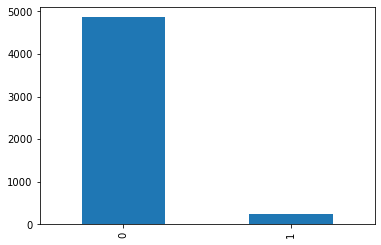

In [281]:
data.stroke.value_counts().plot(kind='bar')

<AxesSubplot:xlabel='stroke', ylabel='count'>

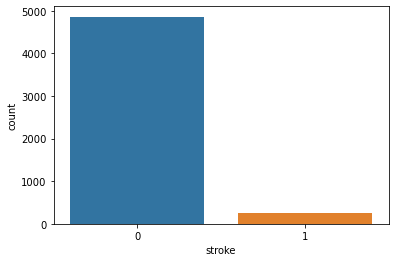

In [282]:
sns.countplot(data.stroke)

# 8. Visualize the Distribution of Male and Female Ages. Write the Observation.

In [283]:
data['gender']=data['gender'].map({'Male':0,'Female':1,'Other':2})

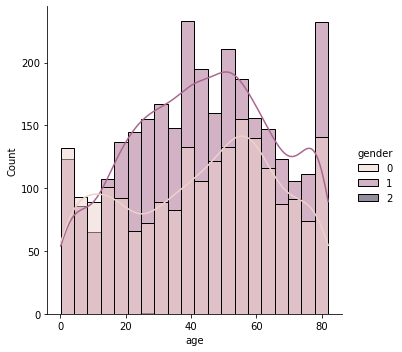

In [284]:
sns.displot(data=data, x='age', hue='gender',kde=True)

# 10.Visualize the stroke sample based on
a) BMI and Glucose Level
b) BMI and Age


<AxesSubplot:xlabel='bmi', ylabel='avg_glucose_level'>

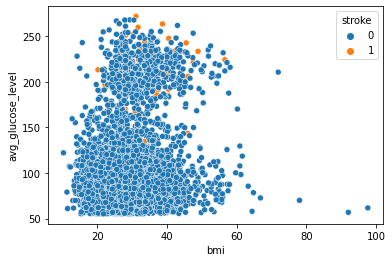

In [285]:
# a) BMI and Glucose Level 
sns.scatterplot(data.bmi,data.avg_glucose_level,hue=data.stroke)

<AxesSubplot:xlabel='bmi', ylabel='age'>

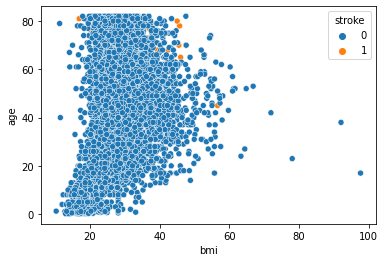

In [286]:
# b) BMI and Age
sns.scatterplot(data.bmi,data.age,hue=data.stroke)

# 11. Using the pie chart visualizes the proportion of different smoking categories among the stroke population

In [287]:
count=data.smoking_status.value_counts()
count

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

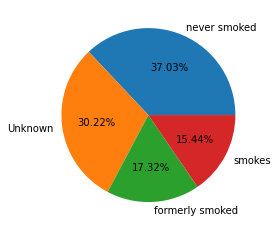

In [288]:
plt.pie(count,labels=['never smoked','Unknown','formerly smoked','smokes'],autopct='%.2f%%')
plt.show()

# 13. Drop the unnecessary columns.

In [289]:
health_data=data.drop(data[['id','work_type']],axis=1)


In [290]:
health_data

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,0,67.0,0,1,Yes,Urban,228.69,36.6,formerly smoked,1
1,1,61.0,0,0,Yes,Rural,202.21,28.1,never smoked,1
2,0,80.0,0,1,Yes,Rural,105.92,32.5,never smoked,1
3,1,49.0,0,0,Yes,Urban,171.23,34.4,smokes,1
4,1,79.0,1,0,Yes,Rural,174.12,24.0,never smoked,1
...,...,...,...,...,...,...,...,...,...,...
5105,1,80.0,1,0,Yes,Urban,83.75,28.1,never smoked,0
5106,1,81.0,0,0,Yes,Urban,125.20,40.0,never smoked,0
5107,1,35.0,0,0,Yes,Rural,82.99,30.6,never smoked,0
5108,0,51.0,0,0,Yes,Rural,166.29,25.6,formerly smoked,0


# 14. Write the code to replace following categories columns in integer format as follow –

# a) work_type('Private':0,'Selfemployed':1,'Govt_job':2,'children':1,'Never_worked':-2)

In [291]:
data['work_type'].value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

In [292]:
data['work_type']=data['work_type'].map({'Private':0,'Self-employed':1,'children':1,'Govt_job':2,'Never_worked':-2})

# b) ever_married('Yes': 1, 'No': 0)

In [293]:
data.ever_married=data['ever_married'].map({'Yes':1,'No':0})

# c) smoking_status('never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1)

In [294]:
data['smoking_status']=data['smoking_status'].map({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1})

In [295]:
data.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,0,67.0,0,1,1,0,Urban,228.69,36.6,2,1
1,51676,1,61.0,0,0,1,1,Rural,202.21,28.1,0,1
2,31112,0,80.0,0,1,1,0,Rural,105.92,32.5,0,1
3,60182,1,49.0,0,0,1,0,Urban,171.23,34.4,-1,1
4,1665,1,79.0,1,0,1,1,Rural,174.12,24.0,0,1


# 15. Check the distribution of 'bmi' and 'stroke' columns in the dataset

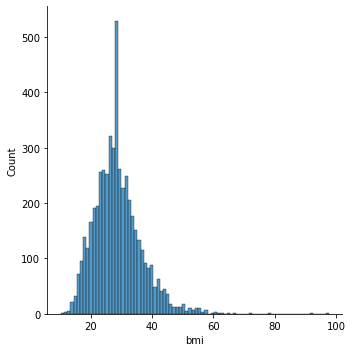

In [296]:
sns.displot(data=data, x='bmi')

<AxesSubplot:xlabel='stroke', ylabel='Density'>

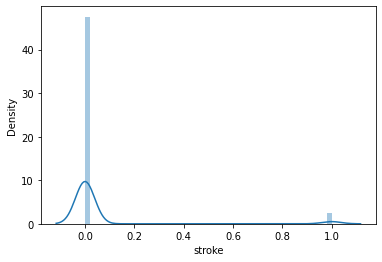

In [297]:
sns.distplot(data.stroke)

# 16. List down columns that are highly skewed.

In [298]:
data.skew()

id                  -0.019913
gender              -0.345664
age                 -0.137059
hypertension         2.715392
heart_disease        3.947244
ever_married        -0.657745
work_type            0.679586
avg_glucose_level    1.572284
bmi                  1.088187
smoking_status       0.082279
stroke               4.193284
dtype: float64

here we can observe that hypertension,heart_disese,avg_glucose_level and stroke are highly positve skewed

# 17. List down the columns that are highly kurtosis

In [299]:
data.kurt()

id                   -1.212368
gender               -1.868001
age                  -0.991010
hypertension          5.375456
heart_disease        13.586052
ever_married         -1.567985
work_type            -0.085432
avg_glucose_level     1.680479
bmi                   3.635306
smoking_status       -0.922415
stroke               15.589736
dtype: float64

# 18. Find the distribution of all variables with respect to the outcome 'stroke' variable.

In [300]:
data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

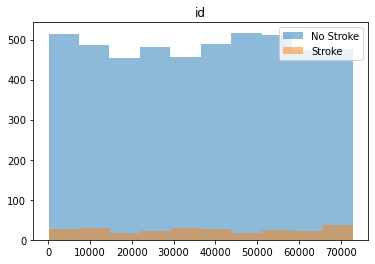

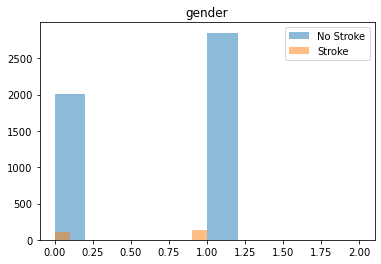

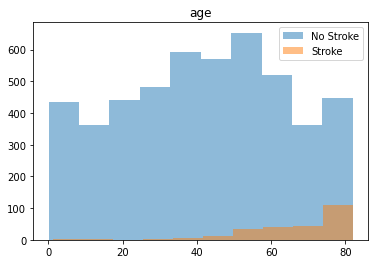

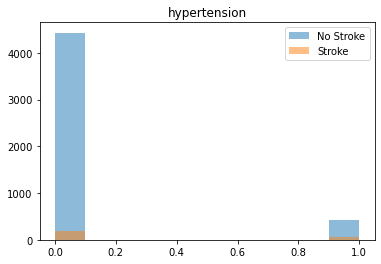

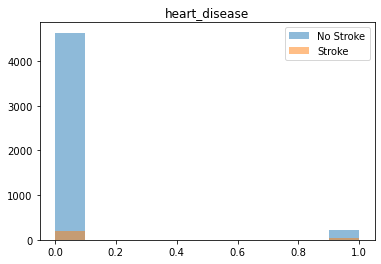

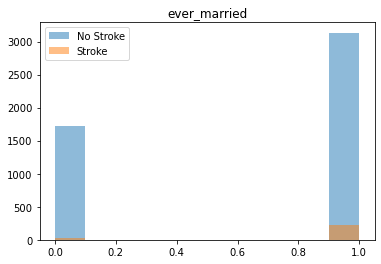

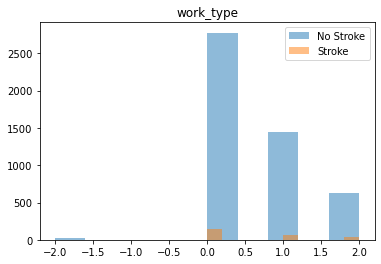

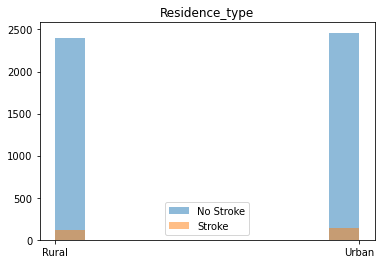

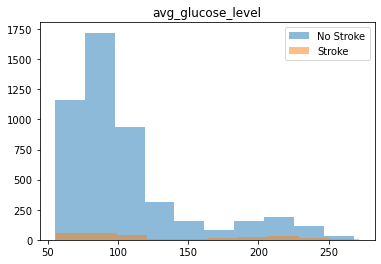

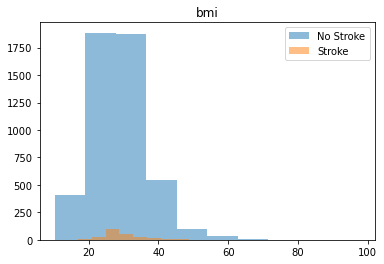

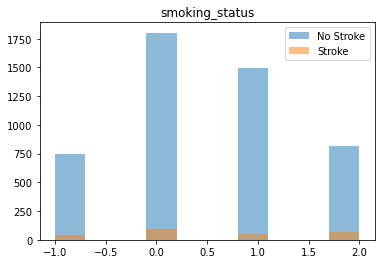

In [301]:
stroke_groups = data.groupby('stroke')

# Plot the distribution of each variable for each group
for col in data.columns:
    if col != 'stroke':
        fig, ax = plt.subplots()
        ax.hist(stroke_groups.get_group(0)[col], alpha=0.5, label='No Stroke')
        ax.hist(stroke_groups.get_group(1)[col], alpha=0.5, label='Stroke')
        ax.set_title(col)
        ax.legend()
        plt.show()


# 19. Plot the heatmap for correlation matrix for the given dataset. Write the observation

In [302]:
df=data.corr()

<AxesSubplot:>

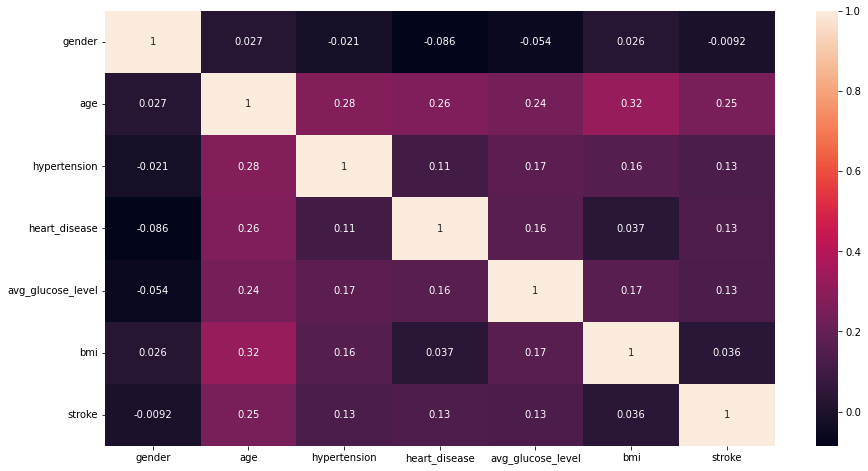

In [305]:
plt.figure(figsize=(15,8))
sns.heatmap(health_data.corr(),annot=True)

# 20. Split the dataset randomly into train and test dataset. Use a train ratio of 70:30 ratio.

In [306]:
health_data['smoking_status']=health_data['smoking_status'].map({'never smoked':0,'Unknown':1,'formerly smoked':2,'smokes':-1})
health_data['Residence_type']=health_data['Residence_type'].map({'Urban':0,'Rural':1})
health_data.ever_married=health_data['ever_married'].map({'Yes':1,'No':0})

In [307]:
X=health_data.drop('stroke',axis=1)
y=health_data['stroke']

In [308]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=10)

In [309]:
X_train.shape

(3577, 9)

In [310]:
X_train

,gender,age,hypertension,heart_disease,ever_married,Residence_type,avg_glucose_level,bmi,smoking_status
335,0,11.0,0,0,0,1,90.69,18.6,1
3174,1,52.0,0,0,1,0,68.88,26.1,1
4181,1,27.0,0,0,1,0,57.46,23.0,-1
1588,1,75.0,1,0,1,0,183.00,20.8,1
2186,0,13.0,0,0,0,1,85.87,24.3,1
...,...,...,...,...,...,...,...,...,...
1180,1,62.0,0,0,1,1,82.57,36.0,2
3441,1,59.0,0,0,1,0,90.06,28.9,-1
1344,0,47.0,0,0,1,1,86.37,39.2,-1
4623,0,25.0,0,0,1,0,166.38,23.1,0


# 21. Check the dataset is balanced or imbalanced. If it is highly investigated, a different approach to balanced the dataset by using the correct technique

In [311]:
data.groupby(['stroke']).count()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status
stroke,,,,,,,,,,,
0,4861,4861,4861,4861,4861,4861,4861,4861,4861,4861,4861
1,249,249,249,249,249,249,249,249,249,249,249


<AxesSubplot:xlabel='stroke', ylabel='count'>

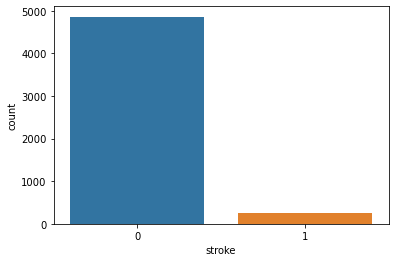

In [312]:
sns.countplot(data.stroke)

In [313]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
X, y = smote.fit_resample(X, y)

df = pd.concat([pd.DataFrame(X), pd.DataFrame(y)], axis=1)

In [314]:
df['stroke'].value_counts()

1    4861
0    4861
Name: stroke, dtype: int64

<AxesSubplot:xlabel='stroke', ylabel='count'>

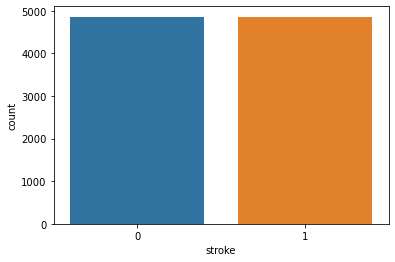

In [315]:
sns.countplot(df.stroke)

# 22. Model Selection/hyperparameter tuning
- Try different models and fine tune their performance until you get the desired level of performance on the given dataset.
- Model Evaluation
- Evaluate the models using appropriate evaluation metrics.

In [316]:
model=LogisticRegression()
model.fit(X_train,y_train)

y_pred=model.predict(X_test)
t=list(X_train.columns)
coef_df = pd.DataFrame(model.coef_, columns= t)
coef_df['intercept'] = model.intercept_
print(coef_df)

     gender       age  hypertension  heart_disease  ever_married  \
0  0.023871  0.072566      0.490642       0.366435     -0.415596   

   Residence_type  avg_glucose_level       bmi  smoking_status  intercept  
0       -0.085826           0.002748 -0.005081       -0.013357  -7.082798  


In [317]:
from sklearn import metrics
model_score = model.score(X_test, y_test)
print(model_score)
print(metrics.confusion_matrix(y_test, y_pred))


0.9471624266144814
[[1452    1]
 [  80    0]]


In [318]:
from sklearn import preprocessing

# scale all the columns of the mpg_df. This will produce a numpy array
#pima_df_scaled = preprocessing.scale(pima_df[0:7])
X_train_scaled = preprocessing.scale(X_train)
X_test_scaled = preprocessing.scale(X_test)

In [319]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_predict = model.predict(X_test_scaled)
model_score = model.score(X_test_scaled, y_test)
print(model_score)


# IMPORTANT: first argument is true values, second argument is predicted values
# this produces a 2x2 numpy array (matrix)
print(metrics.confusion_matrix(y_test, y_predict))

0.9471624266144814
[[1452    1]
 [  80    0]]
